# K-Means Clustering

Cluster Labels: [1 3 2 1 2 2 3 1]
Final Centroids: [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


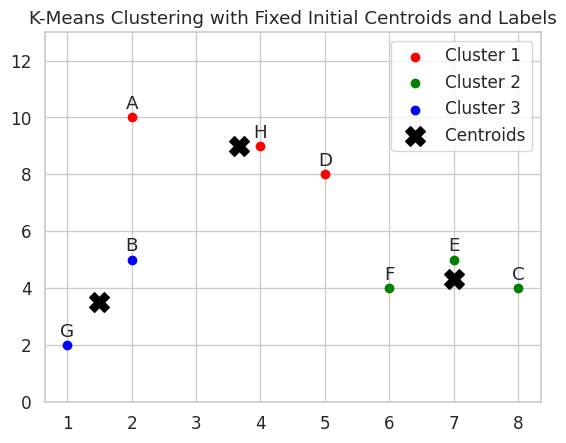

In [30]:
#Code of a normal problem
#Given some coordinates of areas where animals are sighted,
#find 3 clusters where animal sightings happen most frequently

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# 8 Data points
X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])

# Names for each point
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Set your initial centroids manually
initial_centroids = np.array([
    X[0],  # (2, 10)
    X[3],  # (5, 8)
    X[6]   # (1, 2)
])

# Create KMeans model with fixed centroids
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1, random_state=42)
'''
n_clusters=3 → we want 3 clusters

init=initial_centroids → we want to start with the initial centroids

n_init=1 → n_init controls how many times the algorithm runs with different random initial centroids.
If we don't set it, by default KMeans might run 10 times (or more), then pick the best result.
If we fix our initial centroids manually, we should set n_init=1, as we want it to run only once with our given centroids — not randomize anything.
'''
kmeans.fit(X)

# Get labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Labels:", labels+1) #Because for the considered problem, we had Clusters 1, 2, & 3 (Python will consider 0, 1, & 2 by default)
print("Final Centroids:", centroids)

# Plot
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='black', s=200, label='Centroids')

# Add names above points
for i, txt in enumerate(names):
    plt.annotate(txt, (X[i, 0], X[i, 1]+0.3), ha='center')

'''
plt.annotate(txt, (X[i, 0], X[i, 1]+0.3)) → This puts text (txt) on the plot at the coordinates (x, y).
X[i, 0] → the x-coordinate of the i-th point.
X[i, 1] → the y-coordinate of the i-th point.
X[i, 1] + 0.3 → move the label a little bit up above the point, so the text doesn't overlap the dot.
ha='center' → Horizontal alignment of the text above the point (center, instead of left-justified).
'''

plt.title("K-Means Clustering with Fixed Initial Centroids and Labels")
plt.ylim(0,13)
plt.legend()
plt.grid(True)
#plt.show()


In [31]:
#Code of the problem in the book
from sklearn.datasets import load_iris
iris = load_iris()

# print(len(iris)) #8

# for i in iris:
#     print(i)
'''
data
target
frame
target_names
DESCR
feature_names
filename
data_module
'''

# print(iris.DESCR)

# print(iris.data.shape) #(150, 4)

# print(iris.target.shape) #(150,)

# print(iris.target_names) #['setosa' 'versicolor' 'virginica']

# print(iris.feature_names) #['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

import pandas as pd
pd.set_option('display.max_columns', 5)
pd.set_option('display.width', None)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# print(iris_df)
'''
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
'''

iris_df['species'] = [iris.target_names[i] for i in iris.target]
# print(iris_df.head())
'''
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
'''

pd.set_option('display.precision', 2)
# print(iris_df.describe())
'''
       sepal length (cm)  sepal width (cm)  petal length (cm)  I am running a few minutes late; my previous meeting is running over.
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  
count            150.00  
mean               1.20  
std                0.76  
min                0.10  
25%                0.30  
50%                1.30  
75%                1.80  
max                2.50  
'''

print(iris_df['species'].describe())
'''
count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object
'''


count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object


'\ncount        150\nunique         3\ntop       setosa\nfreq          50\nName: species, dtype: object\n'

/home/iteradmin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/iteradmin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/iteradmin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/iteradmin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

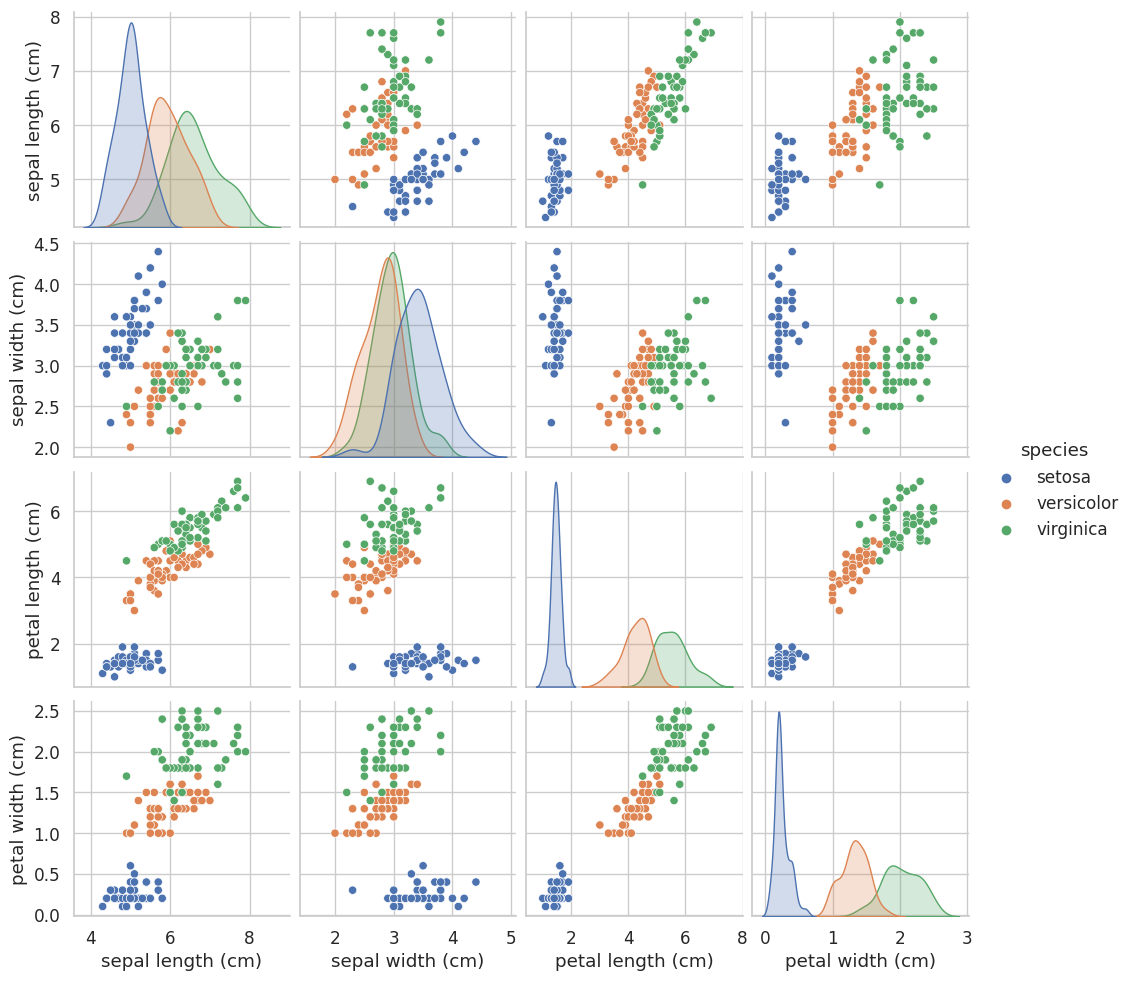

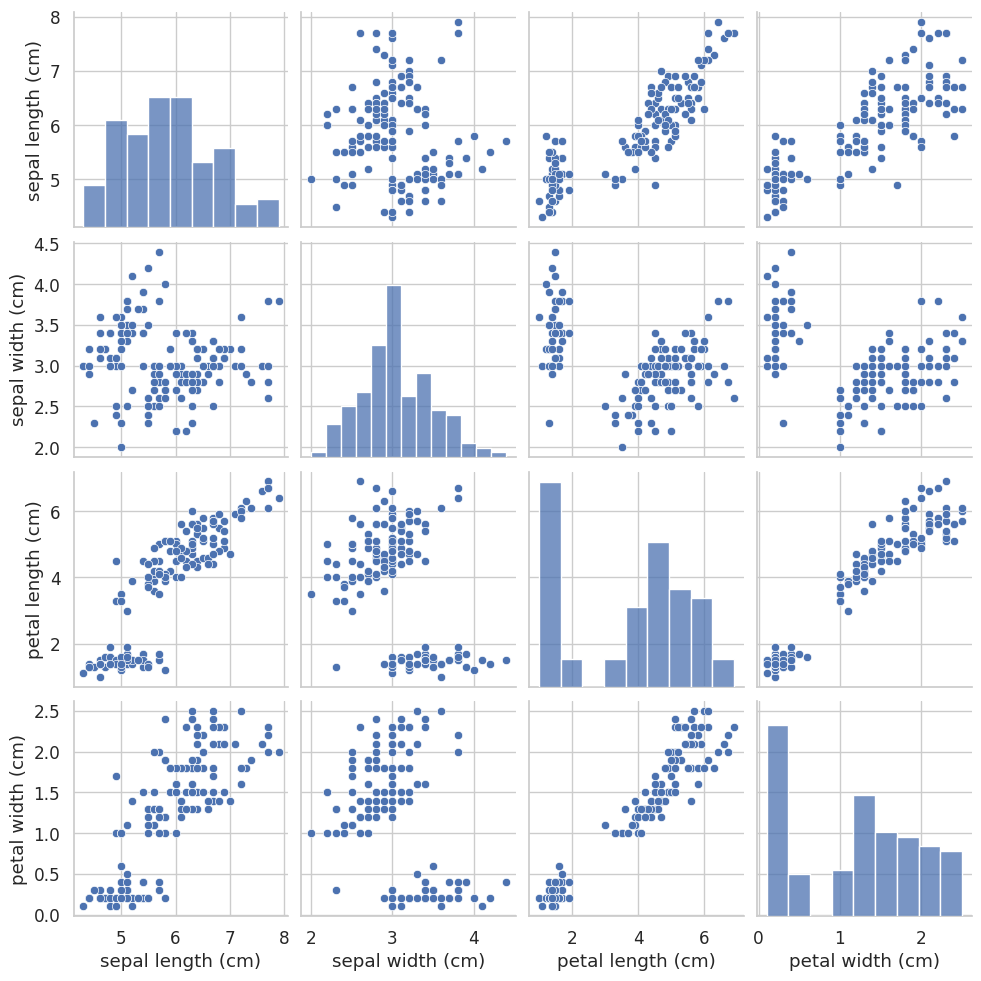

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],hue='species') # without hue, charts will be blue and there will be bar charts instead of curves.
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])
plt.show()

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=11)
kmeans.fit(iris.data)

labels=kmeans.labels_
print(labels[0:50]) # below given outputs are different.
'''
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
The first 50 samples were all placed in cluster 1
'''

print(labels[50:100])
'''
[2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Among the next 50 samples, two were placed in cluster 3 and the rest were all placed in cluster 2
'''

print(labels[100:150])
'''
[2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 2 1 2 2 1]
The last 50 samples were placed in clusters 2 and 3
'''
centroids = kmeans.cluster_centers_
print(centroids)
'''
[[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
'''

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


/home/iteradmin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'\n[[5.006      3.428      1.462      0.246     ]\n [5.88360656 2.74098361 4.38852459 1.43442623]\n [6.85384615 3.07692308 5.71538462 2.05384615]]\n'

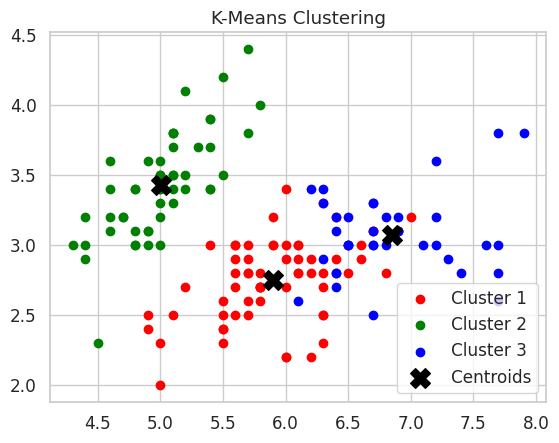

In [34]:
# Plot
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(iris.data[labels == i, 0], iris.data[labels == i, 1], c=colors[i],label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='black',s=200, label='Centroids')
# Add names above points
plt.title("K-Means Clustering")
# plt.ylim(0,13)
plt.legend()
plt.grid(True)
#plt.show()

#################################################
#################################################
#################################################
#################################################

# https://ibb.co/gMyMSSP8
# https://ibb.co/21MZzWKm
# https://ibb.co/hJqQ7kWR